# Case-by-case analysis
This notebook demonstrates how to visualize which model managed to solve which test-case how often.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("white")


samples_training_ft_gpt-4o-2024-08-06_leipzig-university__9ydjNWWH.jsonl_results.jsonl
samples_training_gpt-4o-2024-08-06.jsonl_results.jsonl
samples_training_reference.jsonl_results.jsonl


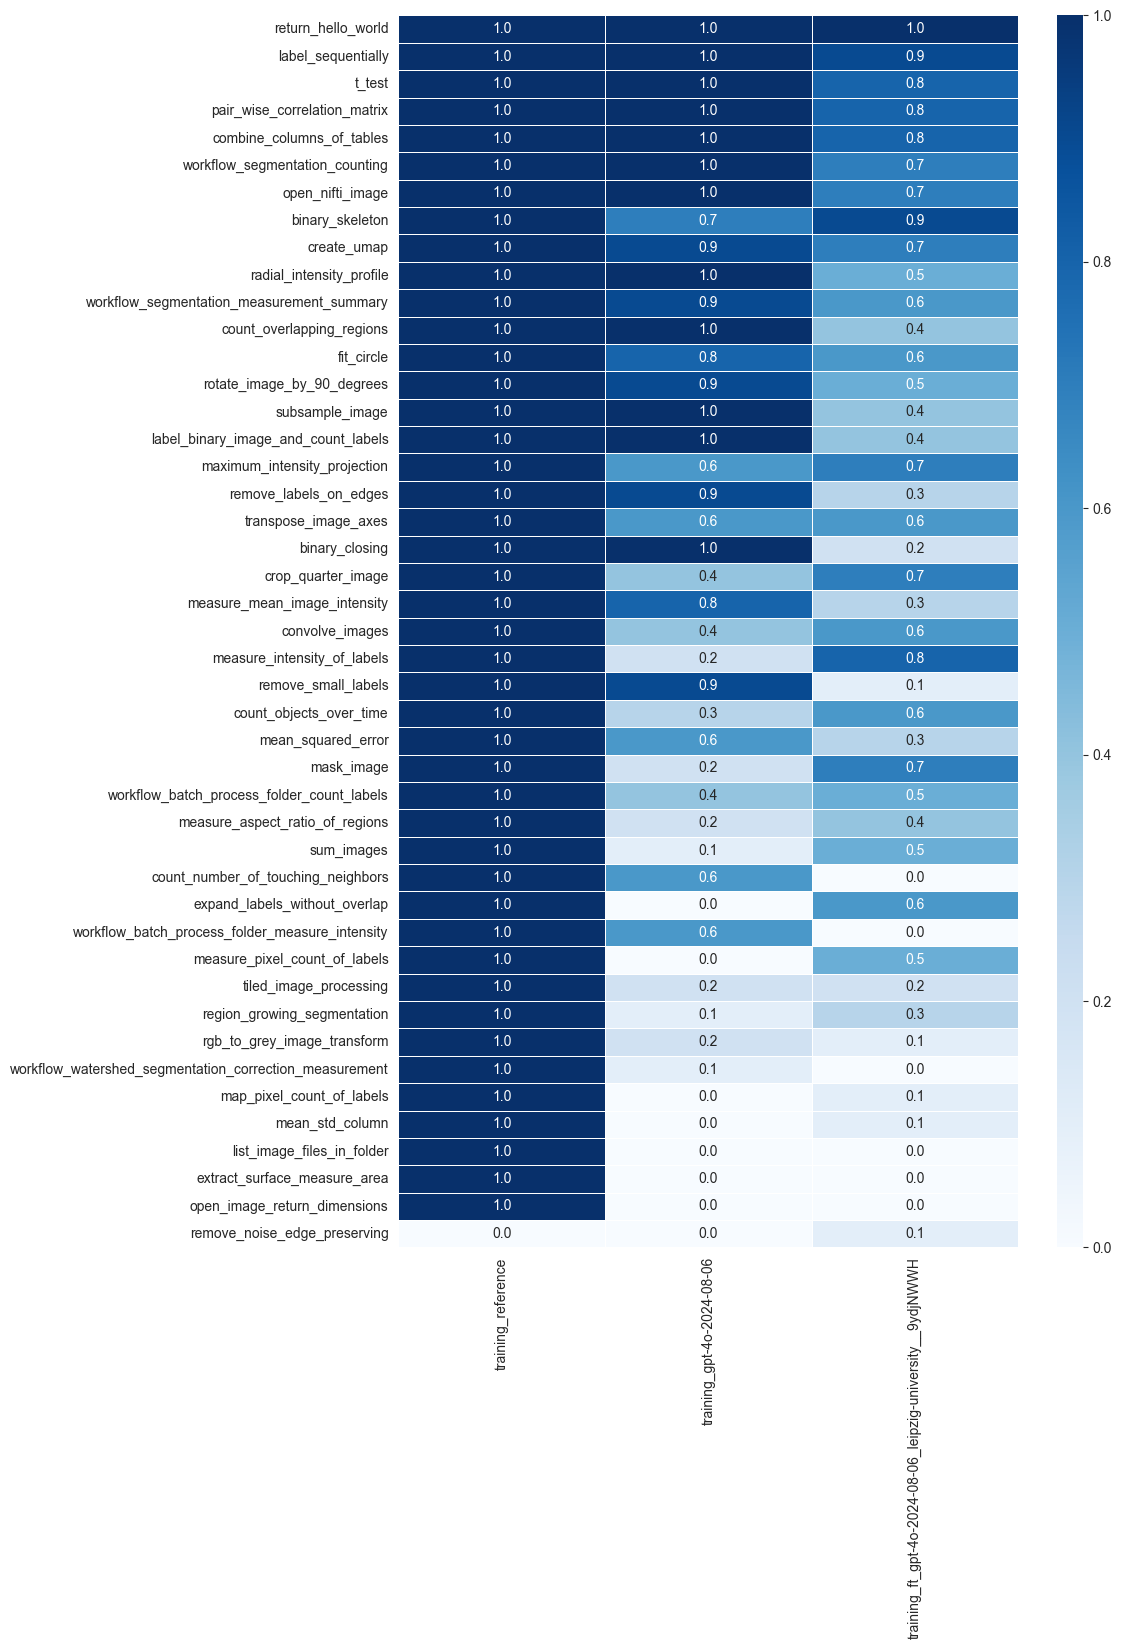

model  training_ft_gpt-4o-2024-08-06_leipzig-university__9ydjNWWH  \
count                                          45.000000            
mean                                            0.444444            
std                                             0.292758            
min                                             0.000000            
25%                                             0.200000            
50%                                             0.500000            
75%                                             0.700000            
max                                             1.000000            

model  training_gpt-4o-2024-08-06  training_reference  average_task_score  
count                   45.000000           45.000000           45.000000  
mean                     0.546667            0.977778            0.495556  
std                      0.398063            0.149071            0.296729  
min                      0.000000            0.000000            0.000000 

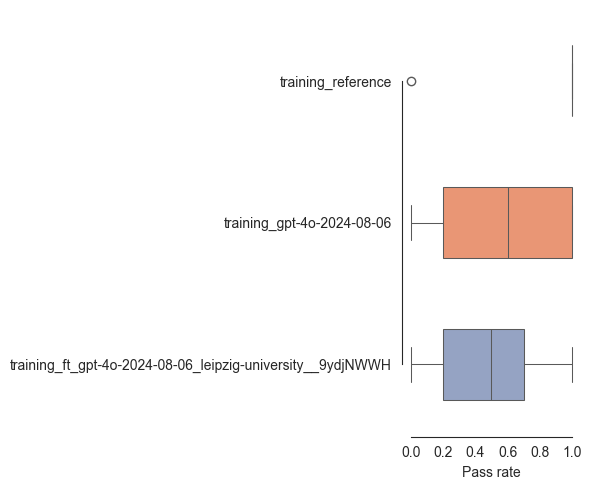

samples_validation_ft_gpt-4o-2024-08-06_leipzig-university__9ydjNWWH.jsonl_results.jsonl
samples_validation_gpt-4o-2024-08-06.jsonl_results.jsonl
samples_validation_reference.jsonl_results.jsonl


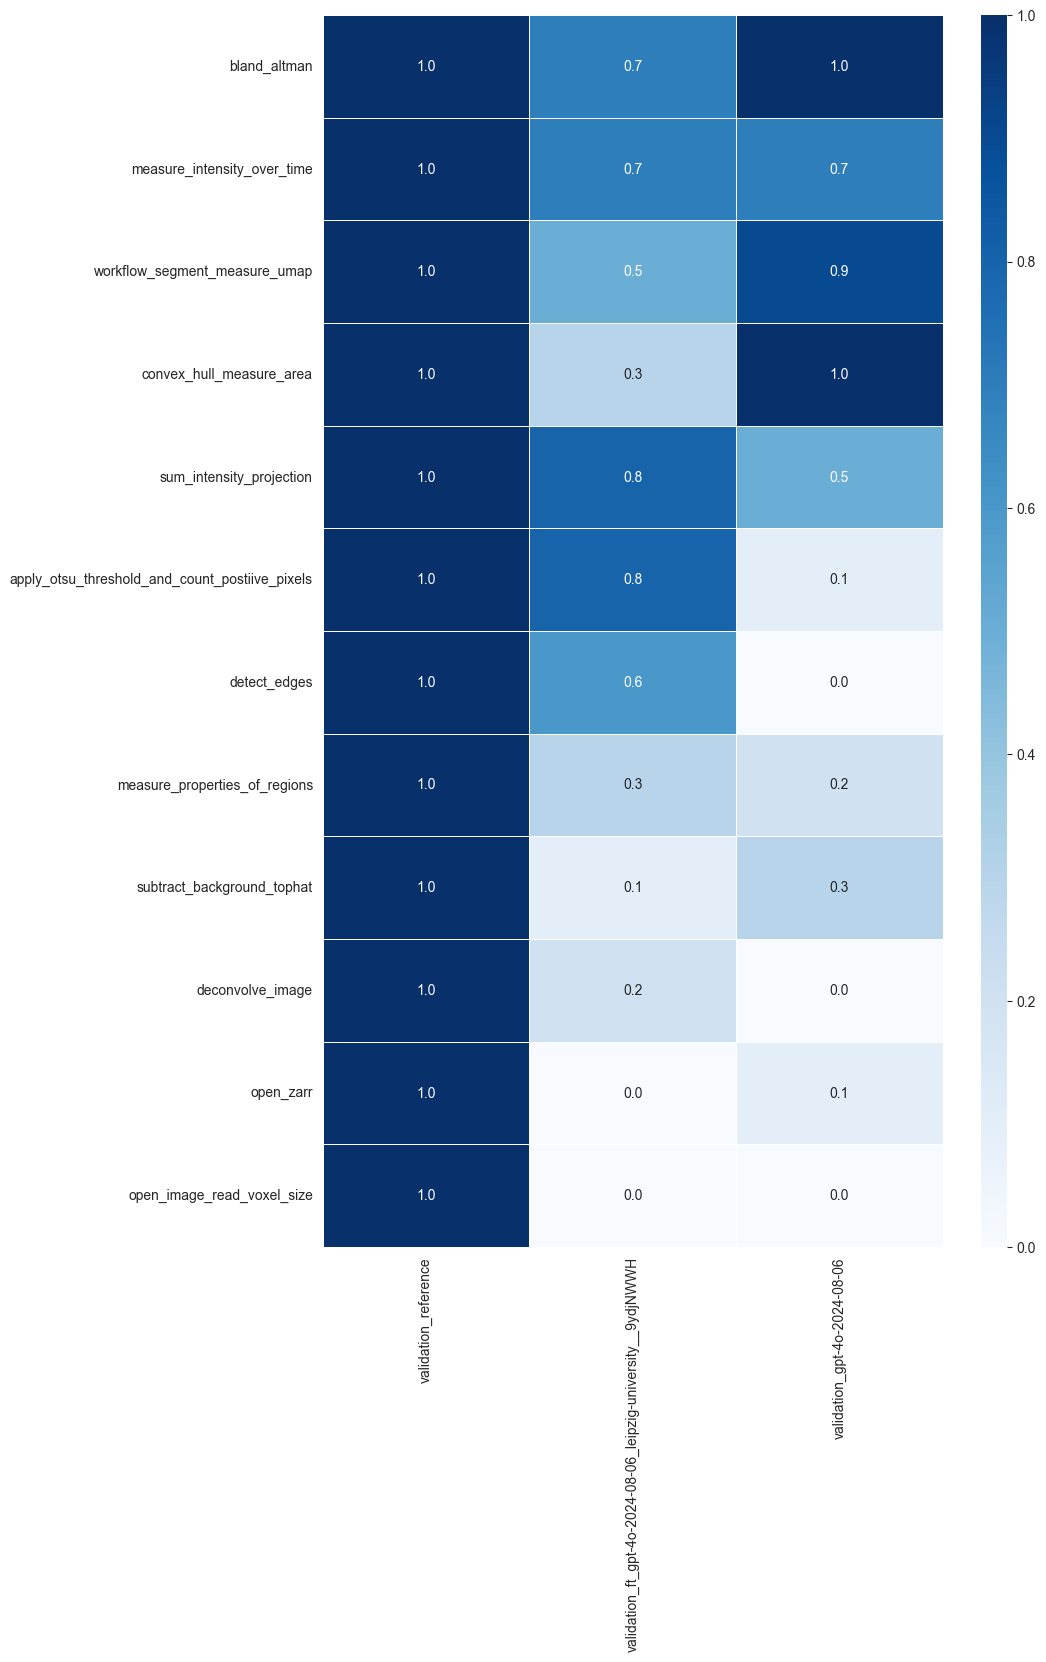

model  validation_ft_gpt-4o-2024-08-06_leipzig-university__9ydjNWWH  \
count                                          12.000000              
mean                                            0.416667              
std                                             0.304014              
min                                             0.000000              
25%                                             0.175000              
50%                                             0.400000              
75%                                             0.700000              
max                                             0.800000              

model  validation_gpt-4o-2024-08-06  validation_reference  average_task_score  
count                     12.000000                  12.0           12.000000  
mean                       0.400000                   1.0            0.408333  
std                        0.402266                   0.0            0.294521  
min                        0.000000     

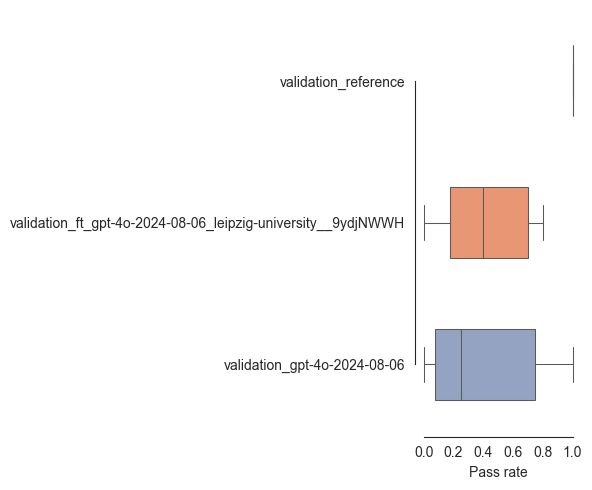

In [2]:
directory = "data/"

for data_set in ["training", "validation"]:
    collection = []
    for filename in os.listdir(directory):
        if filename.endswith("_results.jsonl") and data_set in filename:
            print(filename)
            df = pd.read_json(directory + filename, lines=True)
            df['model'] = filename.replace(".jsonl_results.jsonl", "").replace("samples_", "")
            collection.append(df)
    
    df = pd.concat(collection)
    
    # Ensure the 'passed' column is boolean for correct processing.
    df['passed'] = df['passed'].astype(bool)
    # shorten task name
    df['task_id'] = [str(t).replace("../test_cases/", "").replace(".ipynb","") for t in df['task_id']]
    
    # Pivot the dataframe to count True 'passed' values for each model-task combination.
    pivot_df = df.pivot_table(index='task_id', columns='model', values='passed', aggfunc='mean', fill_value=0)
    
    # Reset the index if 'task_id' needs to be a column instead of an index
    pivot_df.reset_index(inplace=True)
    
    # Apply formatting to display only two digits after the decimal point for all columns after the first (task_id column)
    pivot_df = pivot_df.round(2)
    
    
    df = pivot_df
    
    # Separate the numerical data for plotting and the string column for y-axis labels
    numerical_data = df.select_dtypes(include=[np.number])
    mean_values = numerical_data.mean().sort_values(ascending=False)
    
    # Reorder columns in numerical_data based on sorted mean values
    numerical_data = numerical_data[mean_values.index]
    
    df["average_task_score"] = df.iloc[:,1:-1].mean(axis=1)
    str_column_values = df.sort_values(by="average_task_score", ascending=False)['task_id']  # Replace 'str_column' with the actual column name
    
    # Plotting
    fig = plt.figure(figsize=(10,16))
    numerical_data["average_task_score"] = df.iloc[:,1:-1].mean(axis=1)
    
    sns.heatmap(numerical_data.sort_values("average_task_score",ascending=False).drop(columns=("average_task_score")), annot=True, linewidths=.5, yticklabels=str_column_values, fmt=".1f", cbar_kws={'shrink': 1, 'aspect': 3*16}, cmap="Blues")
    plt.gca().set_xlabel('')
    
    #plt.savefig("../docs/paper/performance_per_task", bbox_inches="tight", dpi=300)
    plt.show()

    print(pivot_df.describe())
    
    # Assuming pivot_df has 'task_id' as a non-numerical column and the rest are numerical and need to be plotted
    numerical_data = pivot_df.drop(columns=['task_id']).drop(columns=("average_task_score"))
    
    # Calculate the mean of each column and sort these means in descending order
    mean_values = numerical_data.mean().sort_values(ascending=False)
    
    # Reorder columns in numerical_data based on sorted mean values
    ordered_numerical_data = numerical_data[mean_values.index]
    
    # Plotting the boxplot with reordered columns and flipping the axes
    plt.figure(figsize=(6, 5))
    boxplot = sns.boxplot(data=ordered_numerical_data, palette= "Set2", width=0.5, linewidth=0.75, orient='h')
    sns.despine(offset=1, trim=True)
    
    plt.yticks(rotation=0)  # Rotate y-axis labels if needed
    plt.xlabel('Pass rate')  # Flip label to x-axis
    plt.gca().set_ylabel('')  # Remove y-axis label
    plt.tight_layout()  # Adjust layout to make room for the y-axis labels
    
    #plt.savefig("../docs/paper/pass_rate_llms.png", dpi=700)
    plt.show()

In [3]:
df.head()

model,task_id,validation_ft_gpt-4o-2024-08-06_leipzig-university__9ydjNWWH,validation_gpt-4o-2024-08-06,validation_reference,average_task_score
0,apply_otsu_threshold_and_count_postiive_pixels,0.8,0.1,1.0,0.45
1,bland_altman,0.7,1.0,1.0,0.85
2,convex_hull_measure_area,0.3,1.0,1.0,0.65
3,deconvolve_image,0.2,0.0,1.0,0.10
4,detect_edges,0.6,0.0,1.0,0.30
